In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [19]:
data_train_path = '/home/abdul/Downloads/Fruits_Vegetables/train'
data_test_path = '/home/abdul/Downloads/Fruits_Vegetables/test'
data_val_path = '/home/abdul/Downloads/Fruits_Vegetables/validation'

In [9]:
img_width = 180
img_height = 180

In [13]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(img_width, img_height),batch_size=32,validation_split=False)

Found 3115 files belonging to 36 classes.


In [17]:
data_cat = data_train.class_names

In [45]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,shuffle=True,image_size=(img_width, img_height),batch_size=32,validation_split=False)

Found 351 files belonging to 36 classes.


In [23]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=True,image_size=(img_width, img_height),batch_size=32,validation_split=False)

Found 359 files belonging to 36 classes.


2025-04-20 22:00:50.037018: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24556032 exceeds 10% of free system memory.
2025-04-20 22:00:51.909686: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


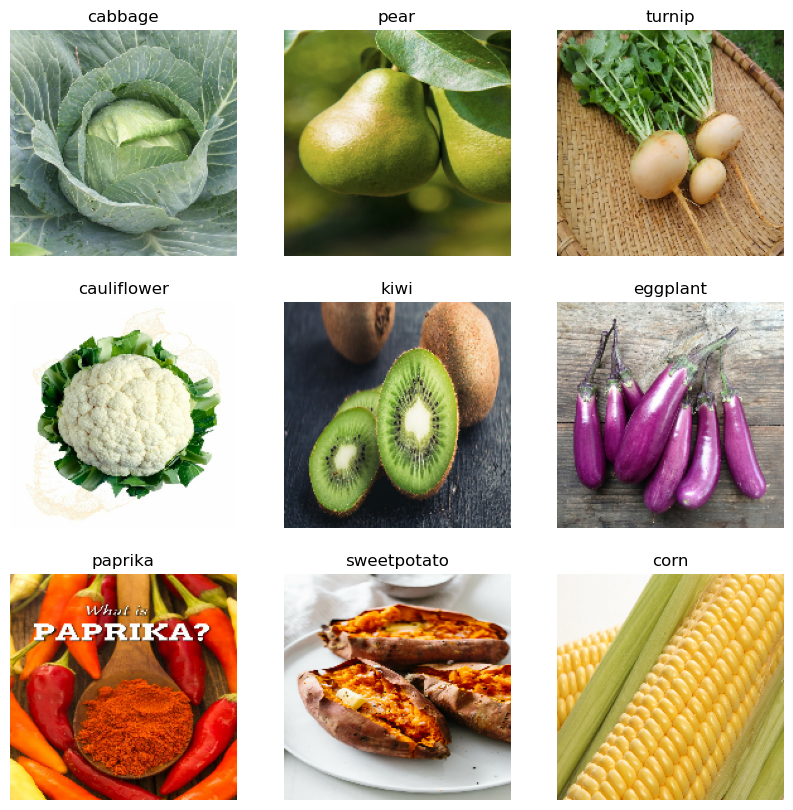

In [27]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [29]:
from tensorflow.keras.models import Sequential

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [47]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
 6/11 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1675 - loss: 2.9618

2025-04-20 22:08:28.285947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1800 - loss: 2.9506

2025-04-20 22:08:29.615383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2158 - loss: 2.8938

2025-04-20 22:08:32.770287: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:08:38.383266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2220 - loss: 2.8799 - val_accuracy: 0.4359 - val_loss: 2.0803
Epoch 2/25
 6/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4267 - loss: 2.0515

2025-04-20 22:08:51.151930: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4334 - loss: 2.0421

2025-04-20 22:08:51.395286: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4579 - loss: 1.9799

2025-04-20 22:08:58.613629: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:09:02.282642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4612 - loss: 1.9705 - val_accuracy: 0.7179 - val_loss: 1.2919
Epoch 3/25
 5/11 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6122 - loss: 1.4259

2025-04-20 22:09:10.661109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6321 - loss: 1.4008

2025-04-20 22:09:14.282309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6528 - loss: 1.3480

2025-04-20 22:09:25.340947: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:09:25.709312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6556 - loss: 1.3388 - val_accuracy: 0.7949 - val_loss: 0.8665
Epoch 4/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3:08 19s/step - accuracy: 0.7188 - loss: 0.9410

2025-04-20 22:09:47.215689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8353 - loss: 0.6653

2025-04-20 22:09:53.830514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8498 - loss: 0.6392

2025-04-20 22:09:56.945112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:10:02.236942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8516 - loss: 0.6366 - val_accuracy: 0.9145 - val_loss: 0.3411
Epoch 5/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9095 - loss: 0.3284

2025-04-20 22:10:10.786372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:10:10.802692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9211 - loss: 0.3102

2025-04-20 22:10:22.075039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:10:24.534236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9220 - loss: 0.3106 - val_accuracy: 0.9687 - val_loss: 0.2294
Epoch 6/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3:06 19s/step - accuracy: 1.0000 - loss: 0.0631

2025-04-20 22:10:49.349289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9720 - loss: 0.1643

2025-04-20 22:10:52.870768: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9602 - loss: 0.1925

2025-04-20 22:11:02.656963: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:11:04.001485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9593 - loss: 0.1924 - val_accuracy: 0.9858 - val_loss: 0.0843
Epoch 7/25


2025-04-20 22:11:12.915884: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/11 ━━━━━━━━━━━━━━━━━━━━ 8s 986ms/step - accuracy: 1.0000 - loss: 0.0242

2025-04-20 22:11:15.677889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9890 - loss: 0.0925

2025-04-20 22:11:26.440291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:11:29.424904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9885 - loss: 0.0942 - val_accuracy: 0.9915 - val_loss: 0.0726
Epoch 8/25
 5/11 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9907 - loss: 0.0444

2025-04-20 22:11:38.184318: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9900 - loss: 0.0487

2025-04-20 22:11:41.447783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9881 - loss: 0.0680

2025-04-20 22:11:47.891730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:11:51.538606: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9874 - loss: 0.0727 - val_accuracy: 0.9915 - val_loss: 0.0445
Epoch 9/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.9531 - loss: 0.0646  

2025-04-20 22:12:17.238279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9616 - loss: 0.0602

2025-04-20 22:12:22.220904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9627 - loss: 0.1141

2025-04-20 22:12:39.520168: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:12:41.420888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9628 - loss: 0.1181 - val_accuracy: 0.9886 - val_loss: 0.1066
Epoch 10/25


2025-04-20 22:12:53.701599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/11 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9722 - loss: 0.0821

2025-04-20 22:13:06.551478: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9695 - loss: 0.1090

2025-04-20 22:13:18.330136: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:13:19.116839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9692 - loss: 0.1123 - val_accuracy: 0.9915 - val_loss: 0.0696
Epoch 11/25


2025-04-20 22:13:34.908055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/11 ━━━━━━━━━━━━━━━━━━━━ 2:12 13s/step - accuracy: 0.9688 - loss: 0.0918

2025-04-20 22:13:36.131069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9649 - loss: 0.1177

2025-04-20 22:13:49.493020: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:13:51.765215: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9650 - loss: 0.1206 - val_accuracy: 0.9858 - val_loss: 0.0854
Epoch 12/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9531 - loss: 0.1250

2025-04-20 22:14:04.205485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9674 - loss: 0.0992

2025-04-20 22:14:08.622597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9767 - loss: 0.0838

2025-04-20 22:14:18.046577: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:14:24.302001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9772 - loss: 0.0876 - val_accuracy: 0.9915 - val_loss: 0.0788
Epoch 13/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0153

2025-04-20 22:14:30.921516: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0158

2025-04-20 22:14:32.966309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9915 - loss: 0.0537

2025-04-20 22:14:44.112526: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:14:46.534472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9910 - loss: 0.0543 - val_accuracy: 0.9915 - val_loss: 0.0850
Epoch 14/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 0.0093

2025-04-20 22:14:52.609556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9922 - loss: 0.1919

2025-04-20 22:14:54.433425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9925 - loss: 0.1523

2025-04-20 22:15:32.619335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:15:34.630100: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9922 - loss: 0.1489 - val_accuracy: 0.9915 - val_loss: 0.0414
Epoch 15/25


2025-04-20 22:16:10.786985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/11 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9857 - loss: 0.0978

2025-04-20 22:16:18.680613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.9914 - loss: 0.0642

2025-04-20 22:16:26.485697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:16:29.984864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9919 - loss: 0.0617 - val_accuracy: 0.9915 - val_loss: 0.0398
Epoch 16/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9766 - loss: 0.1009

2025-04-20 22:16:39.277498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9837 - loss: 0.0728

2025-04-20 22:16:44.641240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9909 - loss: 0.0446

2025-04-20 22:16:58.970248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:17:00.662613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9909 - loss: 0.0450 - val_accuracy: 0.9915 - val_loss: 0.0295
Epoch 17/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9915 - loss: 0.0431

2025-04-20 22:17:11.160973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9900 - loss: 0.0476

2025-04-20 22:17:16.413483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9894 - loss: 0.0582

2025-04-20 22:17:20.766086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:17:23.032355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9894 - loss: 0.0592 - val_accuracy: 0.9915 - val_loss: 0.0538
Epoch 18/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2:58 18s/step - accuracy: 1.0000 - loss: 0.0021

2025-04-20 22:17:45.752755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0024 

2025-04-20 22:17:49.973841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9980 - loss: 0.0212

2025-04-20 22:17:57.667266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:18:01.818842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9974 - loss: 0.0240 - val_accuracy: 0.9915 - val_loss: 0.0287
Epoch 19/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3:13 19s/step - accuracy: 0.9688 - loss: 0.1182

2025-04-20 22:18:26.998324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:18:27.148186: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9858 - loss: 0.0605

2025-04-20 22:18:40.323017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:18:42.610845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9860 - loss: 0.0595 - val_accuracy: 0.9915 - val_loss: 0.0323
Epoch 20/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9688 - loss: 0.0371

2025-04-20 22:18:47.025316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9688 - loss: 0.0796

2025-04-20 22:18:47.664288: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9827 - loss: 0.0570

2025-04-20 22:19:05.489690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:19:06.960322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9832 - loss: 0.0554 - val_accuracy: 0.9915 - val_loss: 0.0161
Epoch 21/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9824 - loss: 0.0183

2025-04-20 22:19:18.598360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/11 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9809 - loss: 0.0204

2025-04-20 22:19:21.828076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9824 - loss: 0.0212

2025-04-20 22:19:29.496312: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:19:33.258759: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9827 - loss: 0.0214 - val_accuracy: 0.9915 - val_loss: 0.0152
Epoch 22/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9954 - loss: 0.0157 

2025-04-20 22:19:46.149416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/11 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9945 - loss: 0.0149

2025-04-20 22:19:49.468965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9927 - loss: 0.0173

2025-04-20 22:19:55.851014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:20:00.486315: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9923 - loss: 0.0181 - val_accuracy: 0.9915 - val_loss: 0.0177
Epoch 23/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0117

2025-04-20 22:20:06.861043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/11 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9972 - loss: 0.0144 

2025-04-20 22:20:11.485155: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9954 - loss: 0.0149

2025-04-20 22:20:20.111831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:20:20.918575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9915 - val_loss: 0.0276
Epoch 24/25


2025-04-20 22:20:27.943856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0139

2025-04-20 22:20:30.027305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9952 - loss: 0.0226

2025-04-20 22:20:40.182801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:20:44.085492: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9948 - loss: 0.0241 - val_accuracy: 0.9915 - val_loss: 0.0226
Epoch 25/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9688 - loss: 0.0286

2025-04-20 22:20:50.452270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9792 - loss: 0.0221

2025-04-20 22:20:55.297796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9855 - loss: 0.0205

2025-04-20 22:21:04.875673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-20 22:21:07.678405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9860 - loss: 0.0203 - val_accuracy: 0.9915 - val_loss: 0.0219


Text(0.5, 1.0, 'Loss')

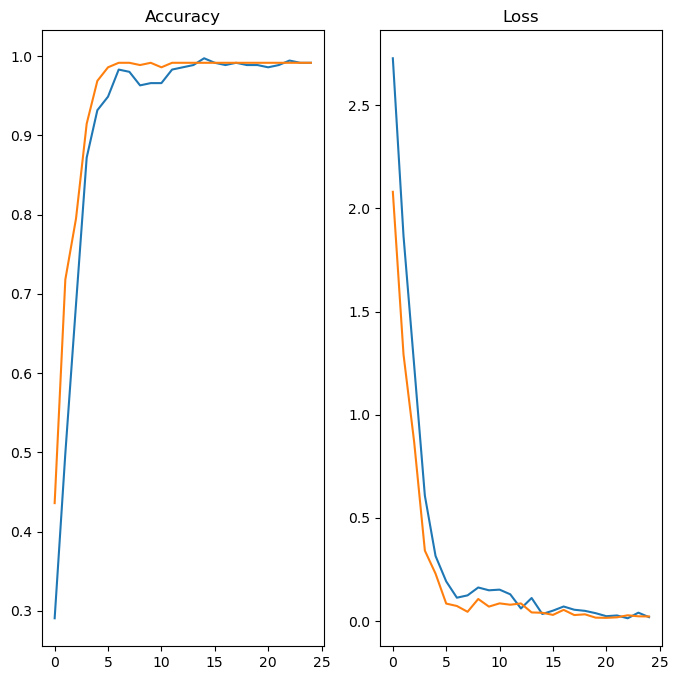

In [48]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [51]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [53]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [55]:
score = tf.nn.softmax(predict)

In [57]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 92.48


In [59]:
model.save('Image_classify.keras')